In [1]:
# load the autoreload extension
%load_ext autoreload
# set the level of reloading
%autoreload 2

from util import *
import torch
from heuristic.heuristic_solver import HeuristicSolver
from spo_model import *
from tqdm import tqdm

from two_stage_model import TwoStageModel


# 0. Load data

In [2]:
data = [parse_datafile(f'../data/cvrp_10000_10_4_4_0.1/instance_{i}') for i in tqdm(range(10_000))]

100%|██████████| 10000/10000 [00:52<00:00, 190.79it/s]


In [3]:
TRAIN_PERCENTAGE = 0.75
VALIDATION_PERCENTAGE = 0.05
TEST_PERCENTAGE = 0.2

num_train = int(len(data) * TRAIN_PERCENTAGE)
num_val = int(len(data) * VALIDATION_PERCENTAGE)
num_test = int(len(data) * TEST_PERCENTAGE)

vrps_train = data[:num_train]
vrps_val = data[num_train:num_train + num_val]
vrps_test = data[num_train + num_val:]
print(f'Number of training instances: {len(vrps_train)}')
print(f'Number of validation instances: {len(vrps_val)}')
print(f'Number of test instances: {len(vrps_test)}')

Number of training instances: 7500
Number of validation instances: 500
Number of test instances: 2000


# 1. 2-stage model

In [4]:
model = TwoStageModel(vrps_train, vrps_val, vrps_test, lr=5e-5)
model.train()
model.test()

Epoch 0: Train Loss: 27291.505046467966 | Validation Loss: 22746.378776805148
Epoch 1: Train Loss: 18815.162504017313 | Validation Loss: 17684.397427795455
Epoch 2: Train Loss: 17133.265319471215 | Validation Loss: 17569.85989746441
Epoch 3: Train Loss: 17086.303487763063 | Validation Loss: 17571.254805943776
Epoch 4: Train Loss: 17060.097605938096 | Validation Loss: 17516.225096962175
Epoch 5: Train Loss: 17038.109313102585 | Validation Loss: 17504.112392140858
Epoch 6: Train Loss: 17020.1247931506 | Validation Loss: 17484.842668632285
Epoch 7: Train Loss: 17005.23373528536 | Validation Loss: 17470.865888019445
Epoch 8: Train Loss: 16993.12542442784 | Validation Loss: 17458.716786810925
Epoch 9: Train Loss: 16983.497307358302 | Validation Loss: 17448.48363824016
Epoch 10: Train Loss: 16975.859209944087 | Validation Loss: 17444.66136688905
Epoch 11: Train Loss: 16969.947533457474 | Validation Loss: 17440.268875176294
Epoch 12: Train Loss: 16965.12742747702 | Validation Loss: 17439.1954

Testing example instance VRP instance: ../data/cvrp_10000_10_4_4_0.1/instance_8000, predicted cost: 114.77667999267578, actual cost: 261.7807547691053
Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-16
Drawing actual solution


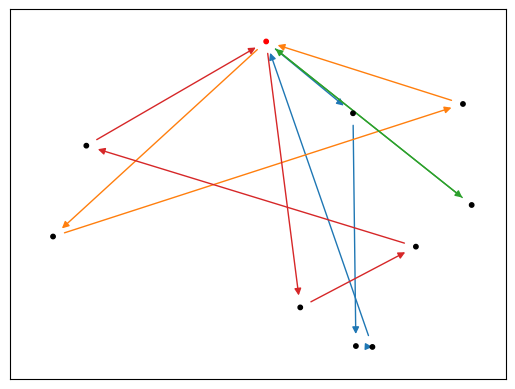

Drawing predicted solution


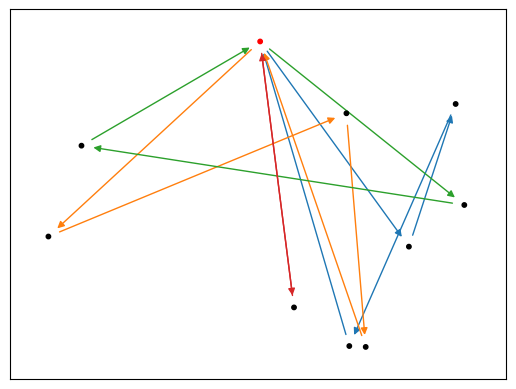

Actual edges (13): [0 -> 3, 0 -> 6, 0 -> 8, 0 -> 9, 1 -> 7, 2 -> 0, 3 -> 1, 4 -> 2, 5 -> 0, 6 -> 5, 7 -> 0, 8 -> 0, 9 -> 4]
Predicted edges (13): [0 -> 4, 0 -> 6, 0 -> 8, 0 -> 9, 1 -> 0, 2 -> 0, 3 -> 7, 4 -> 5, 5 -> 1, 6 -> 3, 7 -> 0, 8 -> 2, 9 -> 0]
Correct edges (5): {7 -> 0, 2 -> 0, 0 -> 9, 0 -> 6, 0 -> 8}
Accuracy: 0.17489678385340102, cost comparison: 2.5233016096391734, regret: 642.6669851094608


In [5]:
test_and_draw(model, vrps_test[0])
test(model, vrps_test, GurobiSolver)

# 2. SPO+ model

In [ ]:
spo_model = SPOModel(vrps_train, vrps_val, vrps_test, solver_class=GurobiSolver, lr=2e-4)
spo_model.train(epochs=200, verbose=False, test_every=10)

0it [00:00, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-16


7500it [00:46, 162.76it/s]


Epoch 1 / 200 done, mean loss: 2805.272963663737, validation loss: 2757.516357421875


7500it [00:45, 163.90it/s]


Epoch 2 / 200 done, mean loss: 2754.759241699219, validation loss: 2713.30126953125


7500it [00:47, 158.34it/s]


Epoch 3 / 200 done, mean loss: 2704.503840169271, validation loss: 2669.1953125


7500it [00:46, 161.60it/s]


Epoch 4 / 200 done, mean loss: 2654.5606165120444, validation loss: 2625.3818359375


7500it [00:46, 161.38it/s]


Epoch 5 / 200 done, mean loss: 2604.947533211263, validation loss: 2581.746337890625


7500it [00:47, 158.46it/s]


Epoch 6 / 200 done, mean loss: 2555.681097729492, validation loss: 2538.314697265625


7500it [00:47, 158.61it/s]


Epoch 7 / 200 done, mean loss: 2506.7844817301434, validation loss: 2495.18994140625


7500it [00:48, 153.49it/s]


Epoch 8 / 200 done, mean loss: 2458.2835861735025, validation loss: 2452.368408203125


7500it [00:47, 158.80it/s]


Epoch 9 / 200 done, mean loss: 2410.155625056966, validation loss: 2409.84716796875


7500it [00:47, 157.18it/s]


Epoch 10 / 200 done, mean loss: 2362.454221028646, validation loss: 2367.6318359375
Accuracy: 0.5836430267036894, cost comparison: 1.2131882376938823, regret: 89.94216320166662


7500it [00:48, 154.44it/s]


Epoch 11 / 200 done, mean loss: 2315.1933881673176, validation loss: 2325.703369140625


7500it [00:50, 148.06it/s]


Epoch 12 / 200 done, mean loss: 2268.360284757487, validation loss: 2284.02685546875


7500it [00:52, 144.19it/s]


Epoch 13 / 200 done, mean loss: 2221.967503759766, validation loss: 2242.6962890625


7500it [00:49, 150.10it/s]


Epoch 14 / 200 done, mean loss: 2176.040713175456, validation loss: 2201.687744140625


7500it [00:49, 151.51it/s]


Epoch 15 / 200 done, mean loss: 2130.5741950276692, validation loss: 2161.018310546875


7500it [00:47, 156.78it/s]


Epoch 16 / 200 done, mean loss: 2085.6102676757814, validation loss: 2120.79833984375


7500it [00:51, 146.08it/s]


Epoch 17 / 200 done, mean loss: 2041.2113362467448, validation loss: 2081.04638671875


7500it [00:51, 145.43it/s]


Epoch 18 / 200 done, mean loss: 1997.4113366373697, validation loss: 2041.7913818359375


7500it [00:50, 148.67it/s]


Epoch 19 / 200 done, mean loss: 1954.2443970784504, validation loss: 2002.9576416015625


7500it [00:51, 146.53it/s]


Epoch 20 / 200 done, mean loss: 1911.7213185302735, validation loss: 1964.5831298828125
Accuracy: 0.5954194107363231, cost comparison: 1.1959275202552435, regret: 82.66002474207104


7500it [00:51, 146.35it/s]


Epoch 21 / 200 done, mean loss: 1869.8499825764975, validation loss: 1926.744384765625


7500it [00:50, 149.21it/s]


Epoch 22 / 200 done, mean loss: 1828.6531700927735, validation loss: 1889.3392333984375


7500it [00:50, 148.52it/s]


Epoch 23 / 200 done, mean loss: 1788.1767133300782, validation loss: 1852.53955078125


7500it [00:49, 150.78it/s]


Epoch 24 / 200 done, mean loss: 1748.4184783854166, validation loss: 1816.374755859375


4033it [00:28, 136.64it/s]